In [1]:
# from PIL import Image

# IMAGE_DATA_PATH = "../../images/vector_db/food_images/"
# img = Image.open(IMAGE_DATA_PATH+"Bread/0.jpg")
# img

In [2]:
# import chromadb

# client = chromadb.Client()

In [3]:
from rag_chroma import get_image_path, make_collection, set_feature_extractor, set_vectordb_model, save_vectordb, query


In [4]:
collection = make_collection()
print(collection)

Collection(id=01891740-aa7b-4cf9-acc6-6bb6edbb2339, name=foods)


In [5]:

PATH = get_image_path()
print(PATH)


../../images/vector_db/food_images/


In [6]:

feature_extractor = set_feature_extractor()
print(feature_extractor)


ViTFeatureExtractor {
  "do_normalize": true,
  "do_rescale": true,
  "do_resize": true,
  "image_mean": [
    0.485,
    0.456,
    0.406
  ],
  "image_processor_type": "ViTFeatureExtractor",
  "image_std": [
    0.229,
    0.224,
    0.225
  ],
  "resample": 2,
  "rescale_factor": 0.00392156862745098,
  "size": {
    "height": 224,
    "width": 224
  }
}



c:\dev\OpenAI_lecture\openat_exam\langchain_chatbot_2\.venv\Lib\site-packages\transformers\models\vit\feature_extraction_vit.py:28: FutureWarning: The class ViTFeatureExtractor is deprecated and will be removed in version 5 of Transformers. Please use ViTImageProcessor instead.
  warnings.warn(


In [7]:

model = set_vectordb_model()
print(model)


Some weights of ViTModel were not initialized from the model checkpoint at facebook/dino-vits16 and are newly initialized: ['pooler.dense.bias', 'pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


ViTModel(
  (embeddings): ViTEmbeddings(
    (patch_embeddings): ViTPatchEmbeddings(
      (projection): Conv2d(3, 384, kernel_size=(16, 16), stride=(16, 16))
    )
    (dropout): Dropout(p=0.0, inplace=False)
  )
  (encoder): ViTEncoder(
    (layer): ModuleList(
      (0-11): 12 x ViTLayer(
        (attention): ViTSdpaAttention(
          (attention): ViTSdpaSelfAttention(
            (query): Linear(in_features=384, out_features=384, bias=True)
            (key): Linear(in_features=384, out_features=384, bias=True)
            (value): Linear(in_features=384, out_features=384, bias=True)
            (dropout): Dropout(p=0.0, inplace=False)
          )
          (output): ViTSelfOutput(
            (dense): Linear(in_features=384, out_features=384, bias=True)
            (dropout): Dropout(p=0.0, inplace=False)
          )
        )
        (intermediate): ViTIntermediate(
          (dense): Linear(in_features=384, out_features=1536, bias=True)
          (intermediate_act_fn): GELUAct

In [8]:

collection = save_vectordb(PATH, model, collection, feature_extractor)
print(collection)


100%|██████████| 110/110 [00:17<00:00,  6.28it/s]

Done!
Collection(id=01891740-aa7b-4cf9-acc6-6bb6edbb2339, name=foods)


In [9]:

prompt = "https://health.chosun.com/site/data/img_dir/2024/01/22/2024012201607_0.jpg"
query_result = query(prompt, model, feature_extractor, collection=collection)

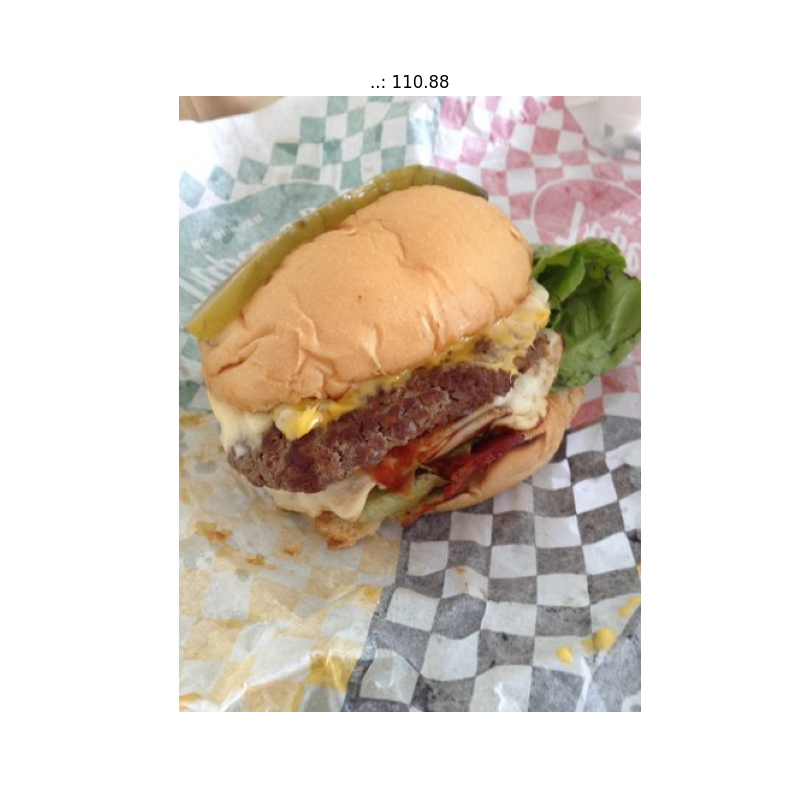

In [10]:
query_result